In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [68]:
#checking for misisng values
df.isnull().sum()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [69]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

<Axes: >

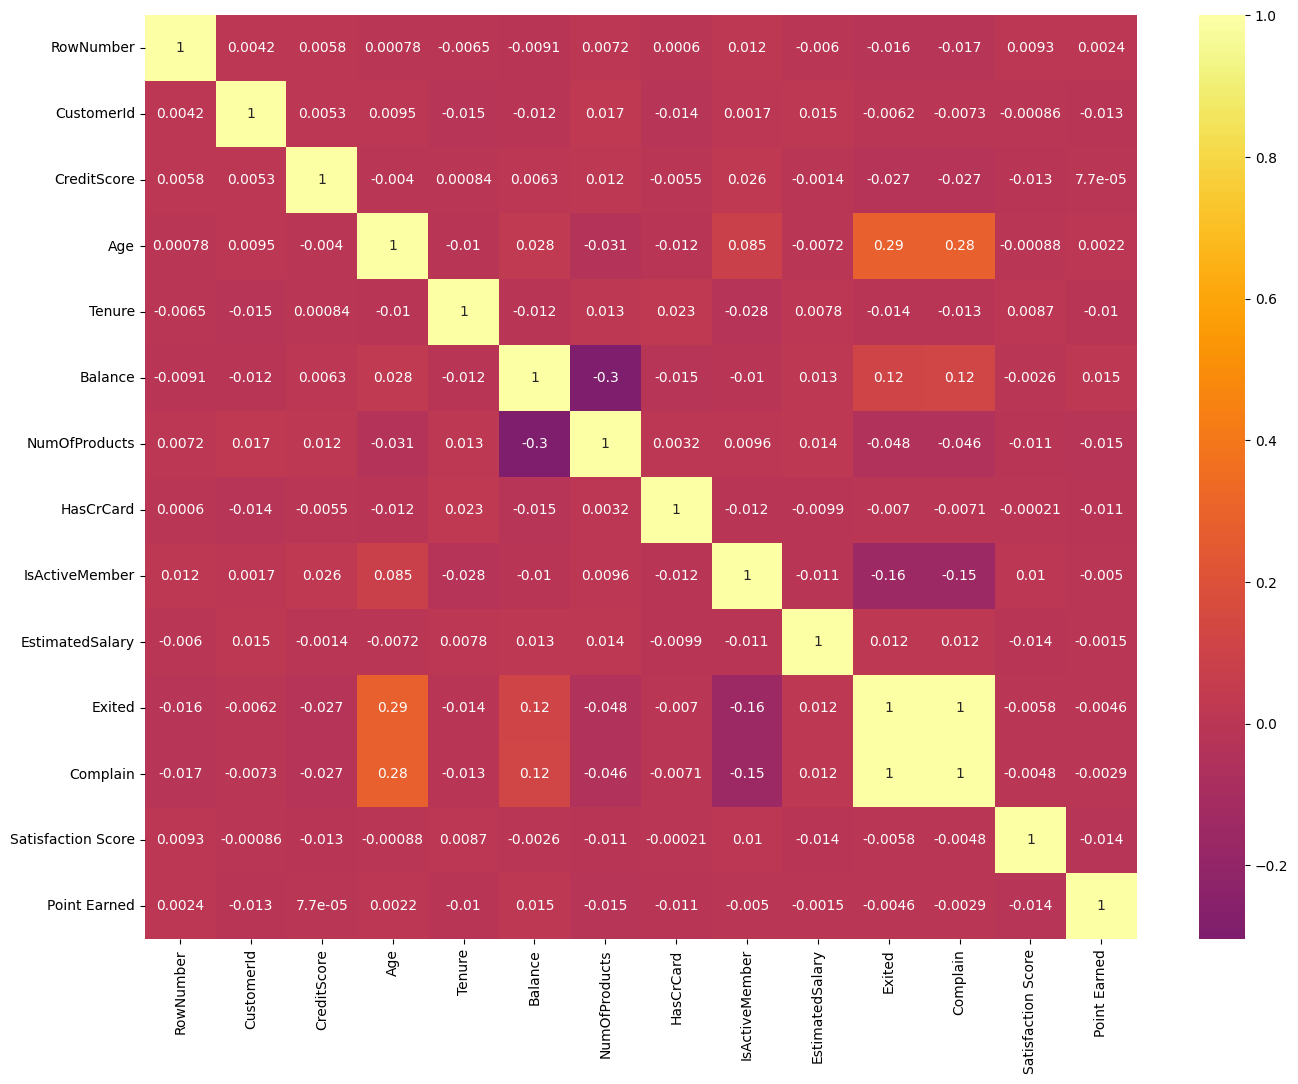

In [71]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[num_columns]


# Compute the correlation matrix

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,annot=True, cmap='inferno', center=0)


<Axes: xlabel='Exited', ylabel='count'>

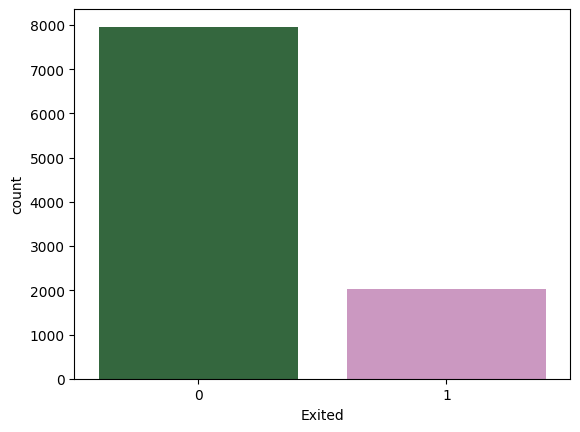

In [73]:
#performing EDA
sns.countplot(x=df['Exited'],palette = "cubehelix")

Accuracy of the prediction: 0.9986666666666667
Classification Report---
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2363
           1       0.99      1.00      1.00       637

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



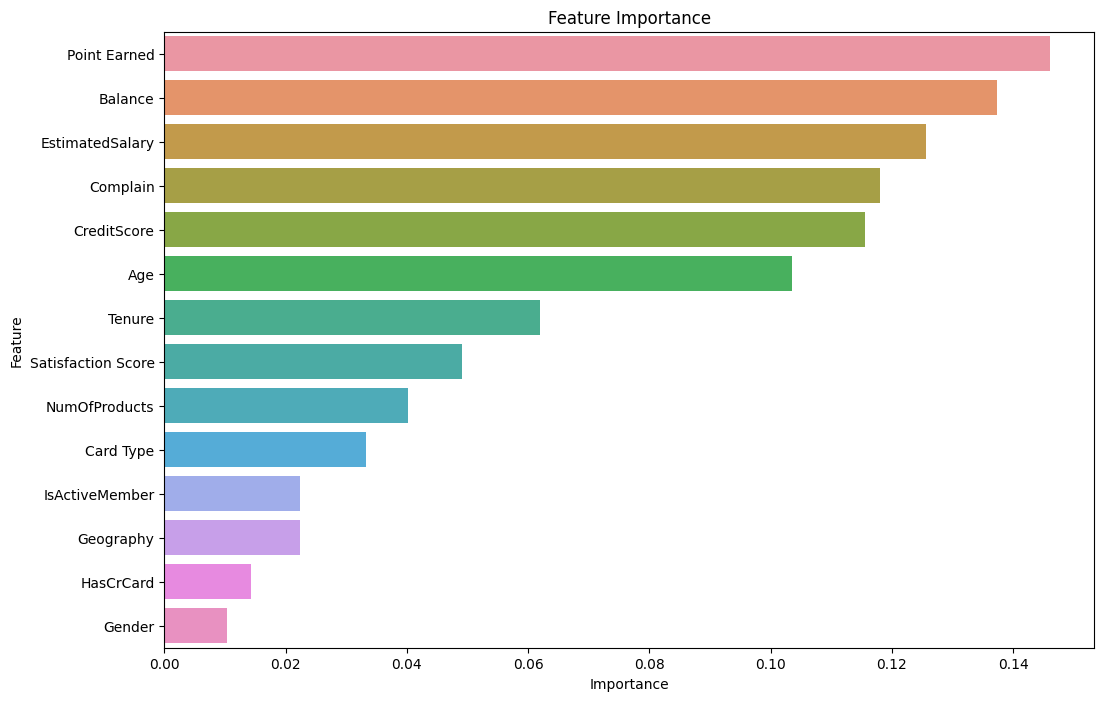

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Encode categorical variables
geography = LabelEncoder()
df['Geography'] = geography.fit_transform(df['Geography'])

gender = LabelEncoder()
df['Gender'] = gender.fit_transform(df['Gender'])

card_type = LabelEncoder()
df['Card Type'] = card_type.fit_transform(df['Card Type'])

# Define features and target variable
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a adaptive boosting classifier
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=150,random_state=35)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of the prediction:", accuracy)
print("Classification Report---\n", report)

# Calculate feature importances

feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [94]:
importance_df

,Feature,Importance
13,Point Earned,0.146053
5,Balance,0.137282
9,EstimatedSalary,0.125618
10,Complain,0.118029
0,CreditScore,0.115551
3,Age,0.103585
4,Tenure,0.062030
11,Satisfaction Score,0.049069
6,NumOfProducts,0.040178
12,Card Type,0.033256


In [76]:
#all components yields the best possible predictions for the model

In [97]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9986666666666667


In [98]:
X_train_trf

array([[ 0.57614487, -0.78515919, -1.38120227, ..., -1.55633285,
        -0.56502705, -0.25898075],
       [-1.36637768,  0.2343227 ,  0.79828543, ..., -0.03609347,
         0.12363437,  0.29848618],
       [-1.32503147, -1.50284524,  0.76785772, ...,  0.22577781,
         1.57102065,  0.71275108],
       ...,
       [-1.42564391, -0.18496847,  0.93865423, ...,  0.37901307,
        -0.10044642,  0.69663717],
       [ 0.75122777, -0.36886373, -1.01944741, ..., -0.56098554,
        -0.90884479, -0.71976597],
       [ 0.56094991, -0.98196599,  1.05484277, ..., -1.5163613 ,
        -0.19741358, -0.03908518]])

In [ ]:

import shap
import xgboost


In [86]:
explainer=shap.TreeExplainer(model)
# Compute SHAP values
shap_values = explainer(X_test)



In [103]:
shap_values

.values =
array([[-1.8111714e-04, -5.6054763e-05, -8.9031462e-05, ...,
        -3.1718988e-05, -2.0722111e-05,  9.8590122e-04],
       [ 6.3832331e-04,  2.3159751e-04,  1.5522107e-04, ...,
         4.7758462e-05, -1.5621446e-03,  7.6525798e-04],
       [-5.9113366e-04,  1.5776548e-04, -5.2383748e-05, ...,
        -2.0010119e-04,  1.2118718e-04,  6.5508961e-05],
       ...,
       [-8.7273744e-04,  2.2860053e-04, -1.3763341e-04, ...,
        -1.9380408e-04,  1.5282461e-04,  1.6023239e-04],
       [-5.1118153e-05, -3.3565823e-04, -1.6485530e-04, ...,
         5.4063989e-05, -3.1741103e-05, -8.2450737e-05],
       [ 6.5159793e-03,  7.1563153e-04,  8.4860425e-05, ...,
        -3.9258201e-05, -1.3852659e-04, -7.6305731e-03]], dtype=float32)

.base_values =
array([0.2001432, 0.2001432, 0.2001432, ..., 0.2001432, 0.2001432,
       0.2001432], dtype=float32)

.data =
array([[-1.1665065 ,  0.29803453,  0.90166613, ...,  0.68314703,
        -0.45091914, -0.6520284 ],
       [ 0.49018942,  0.2980

In [87]:
np.shape(shap_values.values)

(3000, 14)

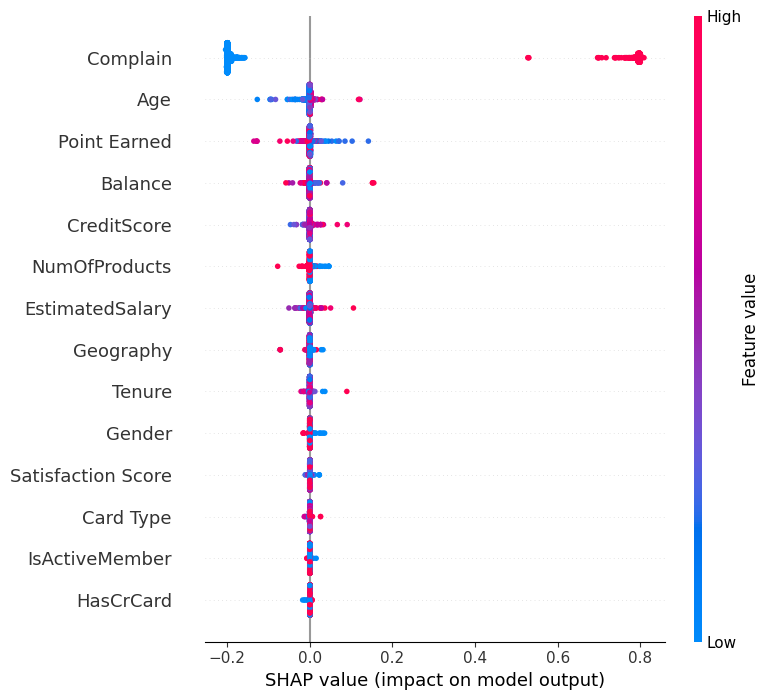

In [95]:
shap.summary_plot(shap_values, X_test,feature_names = importance_df.Feature)

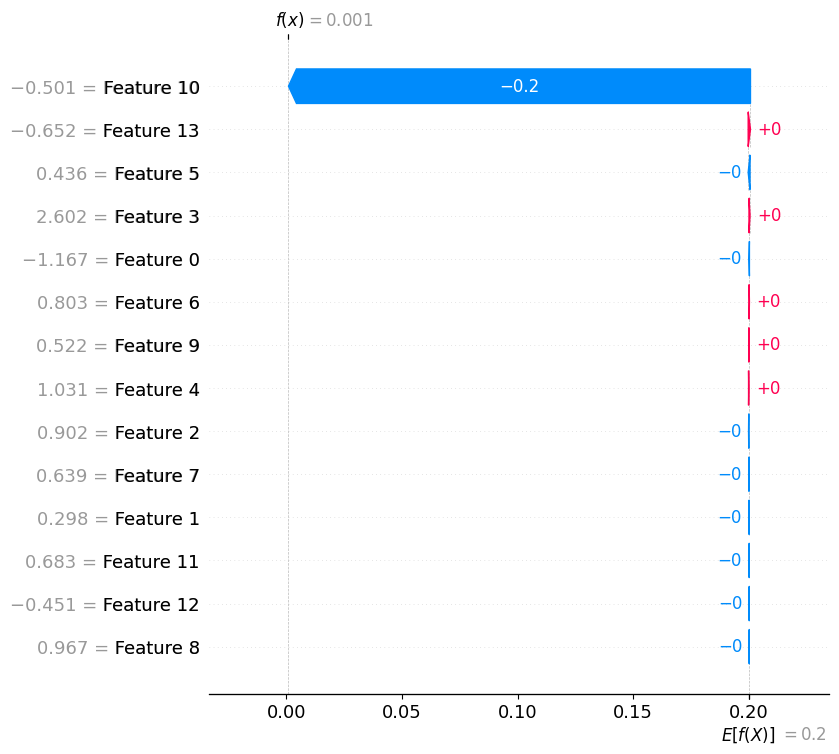

In [109]:
shap.plots.waterfall(shap_values[0],max_display=14)